# QSAR Model Building of Aromatase Inhibitors
<br>
Jesse Maki

# Part 1

In [73]:
! pip install chembl_webresource_client

In [74]:
import pandas as pd
from chembl_webresource_client.new_client import new_client


## Target Search


In [75]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('aromatase')
targets = pd.DataFrame.from_dict(target_query)
targets


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.00,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.00,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


In [76]:

selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

In [77]:


activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [78]:
df = pd.DataFrame.from_dict(res)
df


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742461,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,50.1
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031
2964,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886566,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.042


In [79]:

df.to_csv('Data/bioactivity_data_raw.csv', index=False)


In [80]:

df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742461,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,50.1
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031
2964,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886566,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.042


In [81]:

len(df2.canonical_smiles.unique())

df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr
     

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742455,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,0.09
2956,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742456,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,0.72
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031


In [82]:

selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2955,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.09
2956,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.72
2962,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.0
2963,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.0


In [83]:

df3.to_csv('Data/aromatase_02_bioactivity_data_preprocessed.csv', index=False)

In [84]:
df4 = pd.read_csv('Data/aromatase_02_bioactivity_data_preprocessed.csv')

In [85]:

bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [86]:

bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5
     

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.09,active
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.72,active
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.00,inactive
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.00,active


In [87]:
df5.to_csv('Data/aromatase_03_bioactivity_data_curated.csv', index=False)

# Part 2

### Install Conda and RdKit

In [88]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-08-18 01:13:45--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 2606:4700::6810:8203, 2606:4700::6810:8303, 104.16.131.3, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|2606:4700::6810:8203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M  32.2MB/s    in 2.5s    

2023-08-18 01:13:47 (32.2 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 370: md5sum: command not found
tail: stdout: Broken pipe
expected: 6e267728e74a7089e59c7d8c59d20e6b
     got: 
./Miniconda3-py37_4.8.2-Linux-x86_64.sh: line 392: /usr/local/conda.exe: Permission denied
chmod: /usr/local/conda.exe: No such file or directory
Unpacking payload ...
./Miniconda3-py37_4.8.2-Li

In [89]:
df = pd.read_csv('Data/aromatase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.09,active
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.72,active
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.00,inactive
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.00,active


In [90]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [91]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [92]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL341591,7100.00,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.00,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.00,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.00,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.00,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2111,CHEMBL5203413,0.09,active,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1
2112,CHEMBL5179009,0.72,active,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1
2113,CHEMBL5184829,10000.00,inactive,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...
2114,CHEMBL5176279,31.00,active,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1


In [93]:
import numpy as np
! pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### Calculate Lipinski Descriptors

In [94]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [95]:

df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.53,4.29,2.00,2.00
1,315.50,3.90,2.00,2.00
2,412.31,5.71,0.00,3.00
3,319.38,4.63,0.00,3.00
4,321.81,4.59,0.00,3.00
...,...,...,...,...
2111,368.40,3.94,0.00,6.00
2112,382.42,4.33,0.00,6.00
2113,373.42,3.12,2.00,5.00
2114,369.45,3.86,1.00,7.00


### Combine Dataframe

In [96]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [97]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate,329.53,4.29,2.00,2.00
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive,315.50,3.90,2.00,2.00
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active,412.31,5.71,0.00,3.00
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active,319.38,4.63,0.00,3.00
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active,321.81,4.59,0.00,3.00
...,...,...,...,...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.09,active,368.40,3.94,0.00,6.00
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.72,active,382.42,4.33,0.00,6.00
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.00,inactive,373.42,3.12,2.00,5.00
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.00,active,369.45,3.86,1.00,7.00


### Convert IC50 to pIC50

In [98]:
df_combined.standard_value.describe()

count     2116.00
mean     14342.99
std      50757.16
min          0.00
25%        120.00
50%       1200.00
75%       8495.00
max     777000.00
Name: standard_value, dtype: float64

In [99]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [100]:

-np.log10( (10**-9)* 100000000 )

1.0

In [101]:

-np.log10( (10**-9)* 100000000 )


1.0

In [102]:
def norm_value(input):
    norm = []
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
    input['standard_value_norm'] = norm
    return input.drop('standard_value', axis=1)

def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i*(10**-9)  # Convert nM to M
        pIC50.append(-np.log10(molar))
    input['pIC50'] = pIC50
    return input.drop('standard_value_norm', axis=1)

df_norm = norm_value(df_combined)
df_final = pIC50(df_norm)

In [103]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.53,4.29,2.00,2.00,5.15
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.50,3.90,2.00,2.00,4.30
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.31,5.71,0.00,3.00,6.62
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.38,4.63,0.00,3.00,7.24
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.81,4.59,0.00,3.00,7.27
...,...,...,...,...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,368.40,3.94,0.00,6.00,10.05
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,382.42,4.33,0.00,6.00,9.14
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.42,3.12,2.00,5.00,5.00
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,active,369.45,3.86,1.00,7.00,7.51


In [104]:
df_final.pIC50.describe()

count   2116.00
mean        inf
std         NaN
min        3.11
25%        5.07
50%        5.92
75%        6.92
max         inf
Name: pIC50, dtype: float64

In [105]:

df_final.to_csv('Data/aromatase_04_bioactivity_data_3class_pIC50.csv')

### Removing the 'intermediate' bioactivity class

In [106]:

df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.50,3.90,2.00,2.00,4.30
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.31,5.71,0.00,3.00,6.62
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.38,4.63,0.00,3.00,7.24
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.81,4.59,0.00,3.00,7.27
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.38,4.63,0.00,3.00,7.39
...,...,...,...,...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,368.40,3.94,0.00,6.00,10.05
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,382.42,4.33,0.00,6.00,9.14
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.42,3.12,2.00,5.00,5.00
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,active,369.45,3.86,1.00,7.00,7.51


In [107]:
df_2class.to_csv('Data/aromatase_05_bioactivity_data_2class_pIC50.csv')

### EDA

In [108]:

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

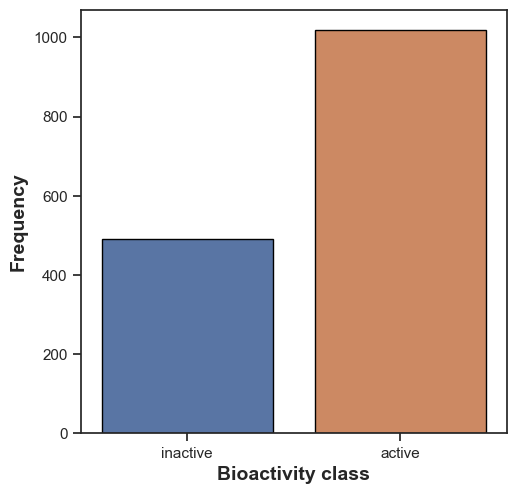

In [109]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Data/plot_bioactivity_class.pdf')

### Scatter plot of MW vs LogP

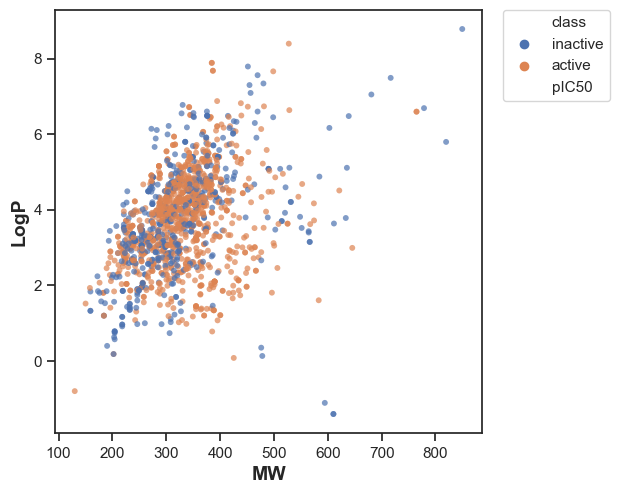

In [110]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


### pIC50 Value

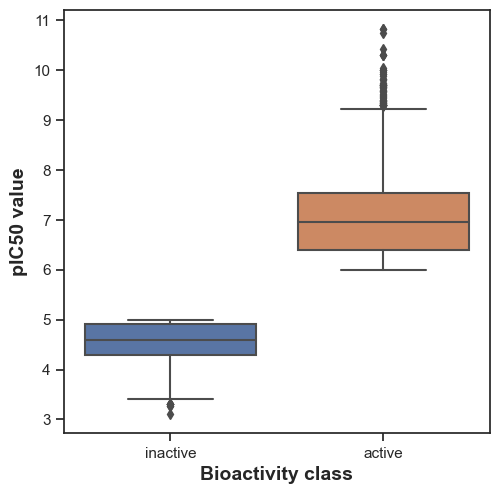

In [111]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('Data/plot_ic50.pdf')
     

### Mann-Whitney U Test

In [112]:

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'Data/mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results
     

In [113]:
mannwhitney('pIC50')


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,501348.00,0.00,0.05,Different distribution (reject H0)


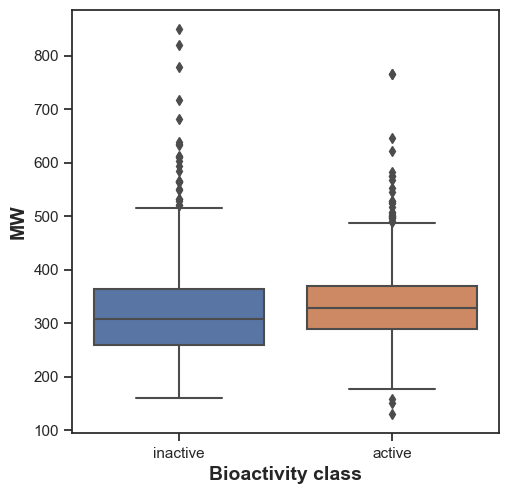

In [114]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('Data/plot_MW.pdf')

In [115]:
mannwhitney('MW')



,Descriptor,Statistics,p,alpha,Interpretation
0,MW,284791.00,0.00,0.05,Different distribution (reject H0)


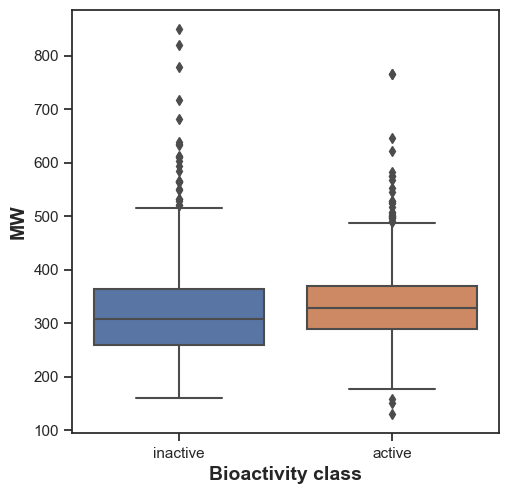

In [116]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('Data/plot_MW.pdf')

In [117]:
mannwhitney('LogP')



,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,252241.50,0.84,0.05,Same distribution (fail to reject H0)


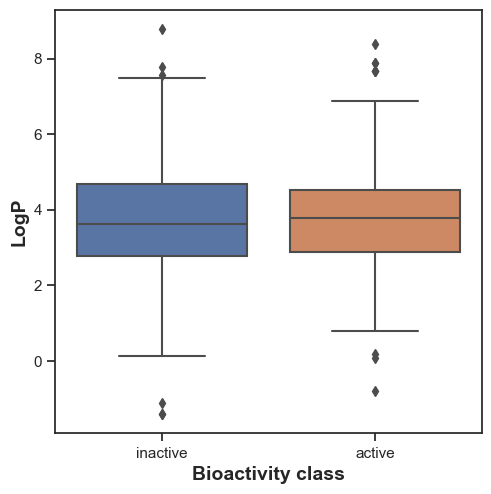

In [118]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('Data/plot_LogP.pdf')

In [119]:
mannwhitney('NumHDonors')




,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,234631.00,0.02,0.05,Different distribution (reject H0)


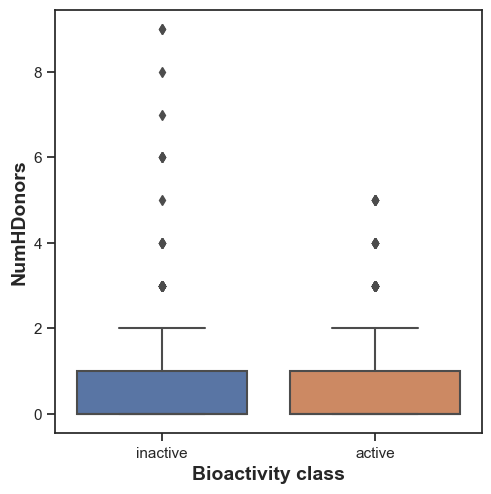

In [120]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('Data/plot_NumHDonors.pdf')
     

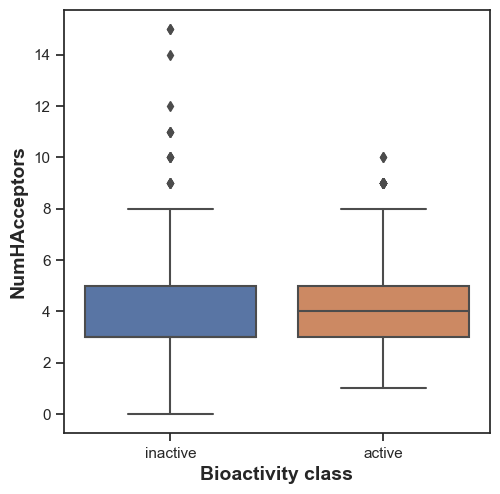

In [121]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('Data/plot_NumHAcceptors.pdf')

In [122]:
mannwhitney('NumHAcceptors')




,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,270837.00,0.01,0.05,Different distribution (reject H0)


Zip Function

In [123]:
# ! zip -r results.zip . -i *.csv *.pdf

### Part 3

In [124]:
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [125]:
df3 = pd.read_csv('Data/aromatase_04_bioactivity_data_3class_pIC50.csv')

In [126]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.53,4.29,2.00,2.00,5.15
1,1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.50,3.90,2.00,2.00,4.30
2,2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.31,5.71,0.00,3.00,6.62
3,3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.38,4.63,0.00,3.00,7.24
4,4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.81,4.59,0.00,3.00,7.27
...,...,...,...,...,...,...,...,...,...
2111,2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,368.40,3.94,0.00,6.00,10.05
2112,2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,382.42,4.33,0.00,6.00,9.14
2113,2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.42,3.12,2.00,5.00,5.00
2114,2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,active,369.45,3.86,1.00,7.00,7.51


In [127]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [128]:
import pandas as pd
df3_X = pd.read_csv('descriptors_output.csv')


In [129]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL111868,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL41761,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,CHEMBL5177269,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2112,CHEMBL5176279,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2113,CHEMBL5177928,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2114,CHEMBL5179009,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Y variable

In [130]:
df3_Y = df3['pIC50']
df3_Y

0       5.15
1       4.30
2       6.62
3       7.24
4       7.27
        ... 
2111   10.05
2112    9.14
2113    5.00
2114    7.51
2115    7.38
Name: pIC50, Length: 2116, dtype: float64

In [131]:

dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3
dataset3.to_csv('Data/aromatase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [132]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [133]:
# ! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2023-08-18 01:13:51--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2023-08-18 01:13:52--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3clas

In [134]:
df = pd.read_csv('Data/aromatase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df = df.drop('Name', axis=1)

In [135]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2112,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2113,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [136]:
Y = df.pIC50
Y


0       5.15
1       4.30
2       6.62
3       7.24
4       7.27
        ... 
2111   10.05
2112    9.14
2113    5.00
2114    7.51
2115    7.38
Name: pIC50, Length: 2116, dtype: float64

In [137]:
X.shape

(2116, 881)

In [138]:
Y.shape

(2116,)

In [139]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [140]:
X.shape

(2116, 160)

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Training and evaluating HistGradientBoostingRegressor...
HistGradientBoostingRegressor RMSE: 1.066059369484258
HistGradientBoostingRegressor R^2 score: 0.33400146200146885



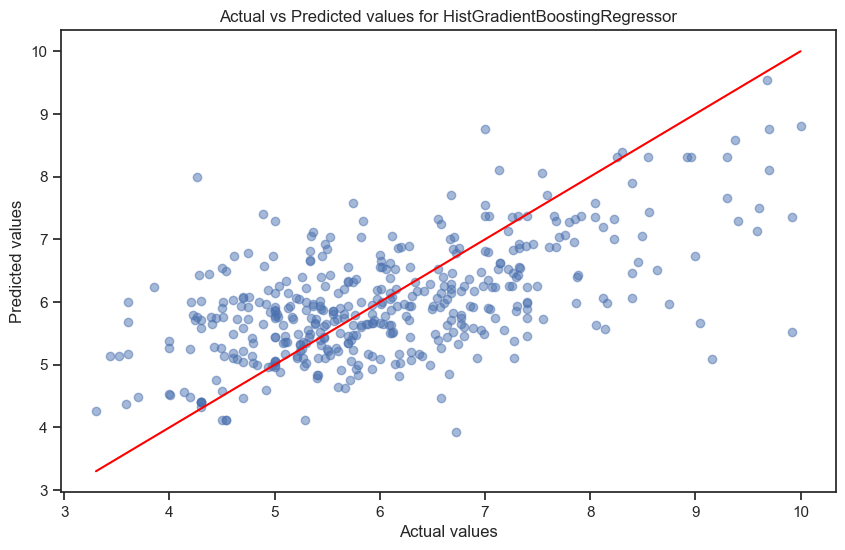

Training and evaluating LGBMRegressor...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 1692, number of used features: 160
[LightGBM] [Info] Start training from score 6.066955
LGBMRegressor RMSE: 1.066059369925929
LGBMRegressor R^2 score: 0.33400146144961906



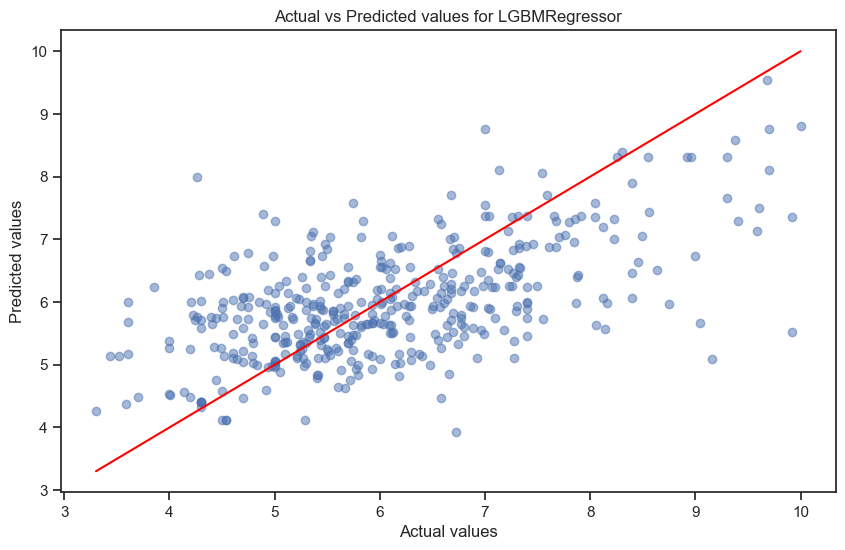

Training and evaluating RandomForestRegressor...
RandomForestRegressor RMSE: 1.097486483916779
RandomForestRegressor R^2 score: 0.2941557947705369



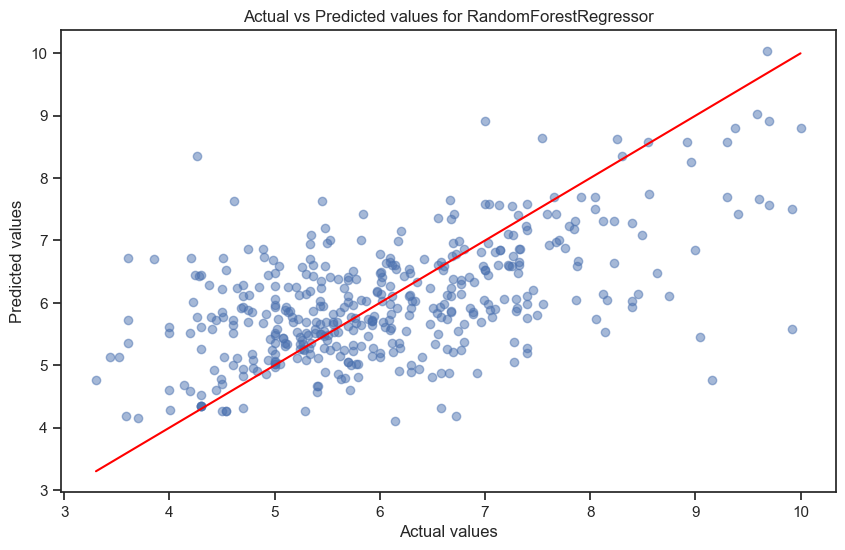

Training and evaluating KNeighborsRegressor...
KNeighborsRegressor RMSE: 1.1450910166722261
KNeighborsRegressor R^2 score: 0.2315944233618782



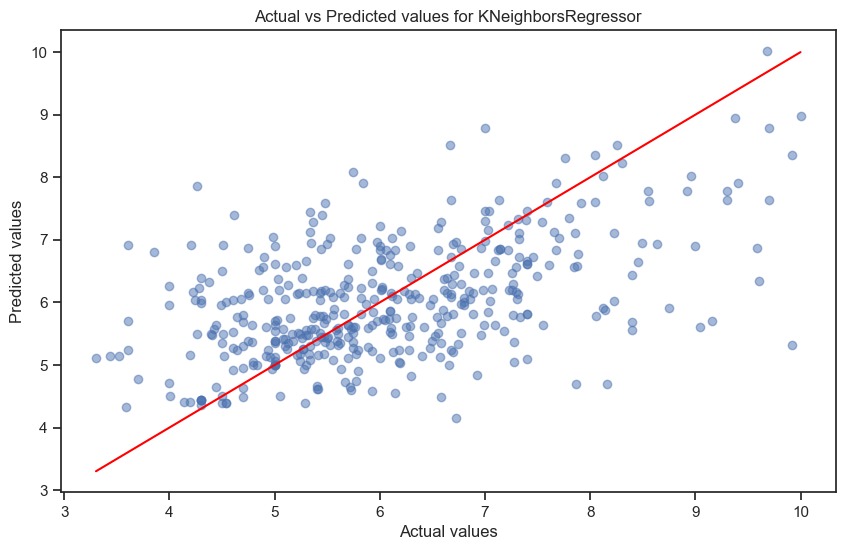

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

# Assuming you've loaded your dataset like:
# data = pd.read_csv("your_dataset.csv")
# X = data.iloc[:, :-1]
# Y = data['pIC50']

# Remove NaN and infinite values
def clean_data(arr):
    if np.isnan(arr).any():
        arr = np.nan_to_num(arr)
    if np.isinf(arr).any():
        max_val = np.nanmax(arr[np.isfinite(arr)])
        arr[np.isposinf(arr)] = max_val
        min_val = np.nanmin(arr[np.isfinite(arr)])
        arr[np.isneginf(arr)] = min_val
    return arr

# Apply the function
Y = clean_data(Y)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the regressors
regressors = {
    'HistGradientBoostingRegressor': HistGradientBoostingRegressor(),
    'LGBMRegressor': LGBMRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

# Train and evaluate each regressor
for name, regressor in regressors.items():
    print(f"Training and evaluating {name}...")
    regressor.fit(X_train, Y_train)  # Fit the regressor
    Y_pred = regressor.predict(X_test)  # Predict on test data
    
    rmse = mean_squared_error(Y_test, Y_pred, squared=False)  # Calculate RMSE
    r2 = r2_score(Y_test, Y_pred)  # Calculate R^2 score
    
    print(f"{name} RMSE: {rmse}")
    print(f"{name} R^2 score: {r2}\n")
    
    # Scatter plot of actual vs. predicted values
    plt.figure(figsize=(10,6))
    plt.scatter(Y_test, Y_pred, alpha=0.5)
    plt.title(f'Actual vs Predicted values for {name}')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red')  # Diagonal line
    plt.show()
